<a href="https://colab.research.google.com/github/Lucas-Petrus/DS-Unit-1-Sprint-2-Statistics/blob/master/Lucas_Petrus_LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [43]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')
df.head()
print(df.shape)



(2761, 15)


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
sample1 = df.sample(20, random_state=42)

sample2 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [45]:
sample1['ConvertedSalary'].mean()

55752.2

In [46]:
sample2['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust the sample mean of 200 more, the greater our sample size allows for us to obtain a smaller margin of error, therefore it is more trustworthy and reflective of the population mean (if a population mean is available). A non technical audience wouldn't have an idea about which is more trustworthy because the audience does not understand the importance of sample size in regard to M.o.E

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

the point estimate should not be relfective of error in a sample population because you are dealing with 1 specific point within a sample and there is a chance that single point of information could vary greatly from the population mean leaving you with an incorrect interpretation of the data set

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



An error bar is one way we could visual represent it to those who are unfamiliar with who statistics work. The error bar can compare two samples and show how much wider a range sits compared to another one

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [0]:
def confidence_interval(data, confidence=.95):
  sample = np.array(data)
  x_bar = sample.mean()
  s = np.std(sample, ddof=1)
  n = len(sample)
  t = stats.t.ppf((1+confidence) / 2, n-1)
  std_err = s / np.sqrt(n)
  moe = std_err * t
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

In [48]:
confidence_interval(sample1['ConvertedSalary'])

(35805.10309625536, 55752.2, 75699.29690374463)

In [49]:
confidence_interval(sample2['ConvertedSalary'])

(60593.058804479086, 68551.255, 76509.45119552092)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [50]:
CI1 = confidence_interval(sample1['ConvertedSalary'])
CI1

(35805.10309625536, 55752.2, 75699.29690374463)

In [51]:
CI2 = confidence_interval(sample2['ConvertedSalary'])
CI2

(60593.058804479086, 68551.255, 76509.45119552092)

In [52]:
print("Mean:", CI1[1])
print("MOE:", CI1[2]-CI1[1])

Mean: 55752.2
MOE: 19947.096903744634


In [53]:
print("Mean:", CI2[1])
print("MOE:", CI2[2]-CI2[1])

Mean: 68551.255
MOE: 7958.196195520912


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

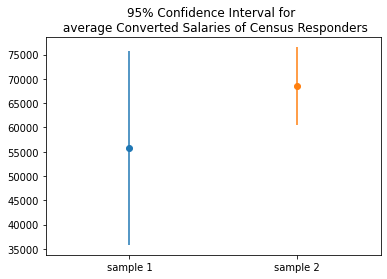

In [54]:
plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI2[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.title('95% Confidence Interval for \n average Converted Salaries of Census Responders')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

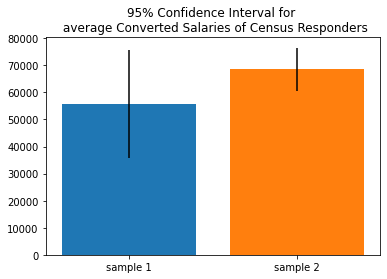

In [55]:
plt.bar(x=0, height=CI1[1], yerr=(CI1[2]-CI1[1]))
plt.bar(x=1, height=CI2[1], yerr=(CI2[2]-CI2[1]))
plt.title('95% Confidence Interval for \n average Converted Salaries of Census Responders')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [32]:
sample3 = df.sample(2671, random_state=42)
sample3

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,11175,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,39067,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,86288,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,15370,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,11780,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Desktop or enterprise appli...,6-8 years,3-5 years,3912.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Immediately after graduating,C;C++;C#;Java;JavaScript;SQL;VBA;VB.NET;Visual...,Male,25 - 34 years old,South Asian
2640,79052,No,"Independent contractor, freelancer, or self-em...","A business discipline (ex. accounting, finance...",Designer;Front-end developer;Full-stack develo...,30 or more years,30 or more years,312808.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,Go;JavaScript;Python;Swift;TypeScript;HTML;CSS,Male,45 - 54 years old,White or of European descent
1522,45519,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Game or...,12-14 years,9-11 years,52089.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;C++;C#;Objective-C;SQL;Swift;Bash/Shell,Male,25 - 34 years old,White or of European descent
1162,33830,"Yes, part-time",Employed full-time,"Another engineering discipline (ex. civil, ele...",Back-end developer;Data scientist or machine l...,9-11 years,3-5 years,51408.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C++;Haskell;Java;Matlab;Python;Bash/Shell,Male,25 - 34 years old,White or of European descent


In [37]:
sample1['ConvertedSalary'].mean()

55752.2

In [39]:
CI3 = confidence_interval(sample3['ConvertedSalary'])
CI3

(71331.59732637726, 73530.97416697866, 75730.35100758006)

In [0]:
##Our confidence interval here show the most precise data with variances of roughly 2,000
#prior to this the closest we had was roughly an 8,000 differential

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Accuracy is a measure of statistical bias while precision is the measure of statistical variability. Accuracy focuses on systematic errors, i.e. the errors caused by the problem in the instrument. As against this, precision is concerned with random error, which occurs periodically with no recognisable pattern.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

A 95% level of confidence means that 95% of the confidence intervals calculated from these random samples will contain the true population mean

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

In [57]:
sample4 = df.sample(500, random_state=42)

confidence_interval(sample4['ConvertedSalary'])

(69468.34501487605, 75109.124, 80749.90298512395)

In [66]:
stats.ttest_1samp(sample4['ConvertedSalary'], 80748)

Ttest_1sampResult(statistic=-1.9640665657265641, pvalue=0.0500770426948513)

In [67]:
stats.ttest_1samp(sample4['ConvertedSalary'], 80750)

Ttest_1sampResult(statistic=-1.9647631820613536, pvalue=0.049996075006924864)

In [0]:
'it means that anything that falls outside of those ranges alters the probability of our null hypothesis failing to reject or being rejectable'

In [40]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-06-10 20:57:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-06-10 20:57:30 (286 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [75]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)
df = df.replace({'?':np.NaN, 'y':1,'n':0}).dropna()

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [82]:
sample5 = df.sample(100, random_state=42)
sample5

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
414,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
138,democrat,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
30,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
324,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
38,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
406,democrat,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
327,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
306,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [78]:
df.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.413793,0.461207,0.530172,0.487069,0.551724,0.642241,0.534483,0.512931,0.487069,0.551724,0.344828,0.465517,0.547414,0.642241,0.370690,0.814655
std,0.493577,0.499571,0.500168,0.500913,0.498393,0.480377,0.499888,0.500913,0.500913,0.498393,0.476340,0.499888,0.498823,0.480377,0.484034,0.389417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
rep = df[df['party'] == 'republican']

In [84]:
confidence_interval(rep['budget'])

(0.08761355698812177, 0.1574074074074074, 0.22720125782669304)

In [85]:
confidence_interval(rep['handicapped-infants'])

(0.13450349074958223, 0.21296296296296297, 0.2914224351763437)

In [86]:
confidence_interval(rep['water-project'])

(0.3765480931771919, 0.4722222222222222, 0.5678963512672525)

In [87]:
confidence_interval(rep['physician-fee-freeze'])

(0.9723853391655276, 0.9907407407407407, 1.009096142315954)

In [88]:
confidence_interval(rep['el-salvador-aid'])

(0.913434261310743, 0.9537037037037037, 0.9939731460966644)

In [91]:
confidence_interval(rep['religious-groups'])

(0.8059979340740583, 0.8703703703703703, 0.9347428066666824)

In [92]:
confidence_interval(rep['anti-satellite-ban'])

(0.18358393802160433, 0.26851851851851855, 0.35345309901543276)

In [93]:
confidence_interval(rep['aid-to-contras'])

(0.08006715123831286, 0.14814814814814814, 0.2162291450579834)

In [94]:
confidence_interval(rep['mx-missile'])

(0.07261245914426012, 0.1388888888888889, 0.20516531863351767)

In [95]:
confidence_interval(rep['immigration'])

(0.4793093369789436, 0.5740740740740741, 0.6688388111692045)

In [96]:
confidence_interval(rep['synfuels'])

(0.08761355698812177, 0.1574074074074074, 0.22720125782669304)

In [98]:
confidence_interval(rep['education'])

(0.7837708549420166, 0.8518518518518519, 0.9199328487616871)

In [99]:
confidence_interval(rep['right-to-sue'])

(0.7727987421733069, 0.8425925925925926, 0.9123864430118782)

In [100]:
confidence_interval(rep['crime'])

(0.955644609582101, 0.9814814814814815, 1.007318353380862)

In [101]:
confidence_interval(rep['duty-free'])

(0.050883138942941386, 0.1111111111111111, 0.17133908327928082)

In [102]:
confidence_interval(rep['south-africa'])

(0.5763247084144121, 0.6666666666666666, 0.7570086249189212)

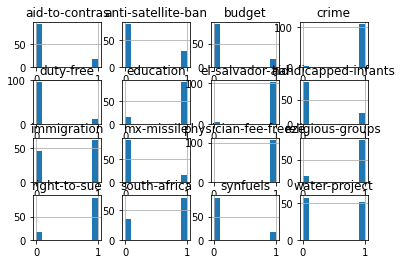

In [106]:
rep.hist()
plt.show()